In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\doshi\Downloads\advertising.csv")

In [74]:
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [75]:
df.shape

(200, 4)

In [76]:
df.duplicated().sum()

0

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [78]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [79]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [80]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

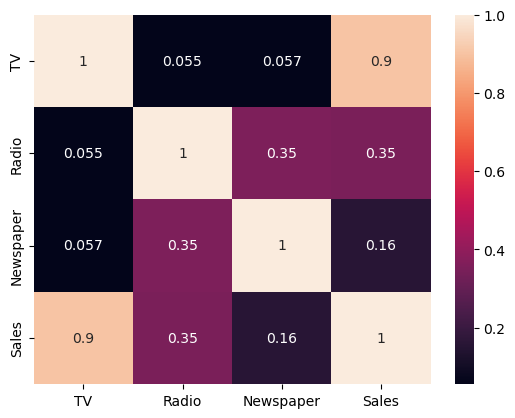

In [81]:
sns.heatmap(df.corr(),annot=True)

# Data Visualisation

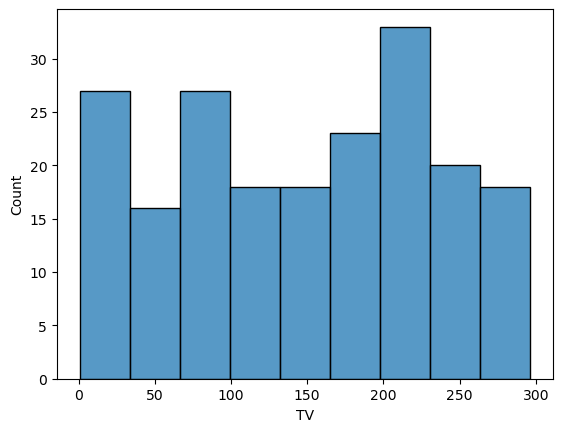

In [82]:
sns.histplot(x=df["TV"],data=df)
plt.show()

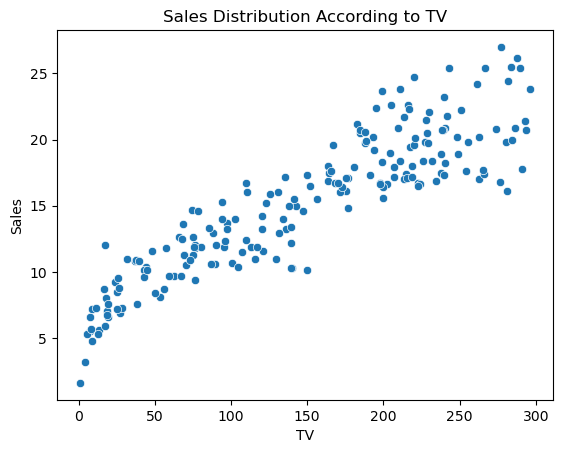

In [89]:
sns.scatterplot(x=df["TV"],y=df["Sales"])
plt.title("Sales Distribution According to TV")
plt.show()

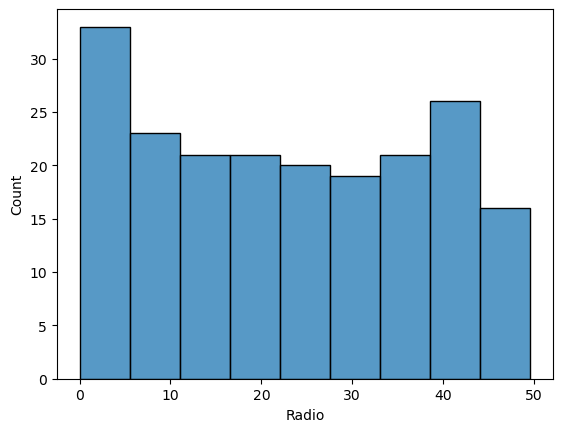

In [98]:
sns.histplot(x=df["Radio"],data=df)
plt.show()

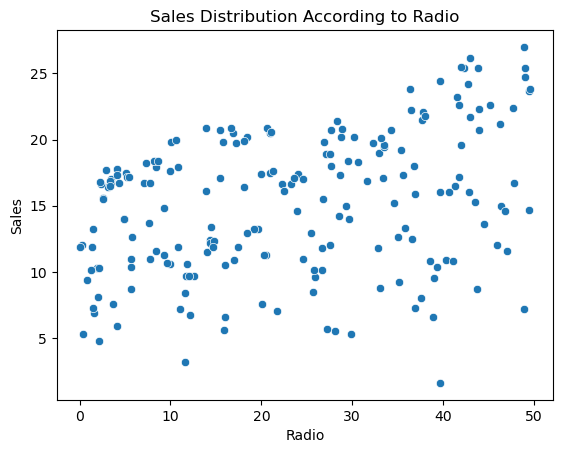

In [99]:
sns.scatterplot(x=df["Radio"],y=df["Sales"])
plt.title("Sales Distribution According to Radio")
plt.show()

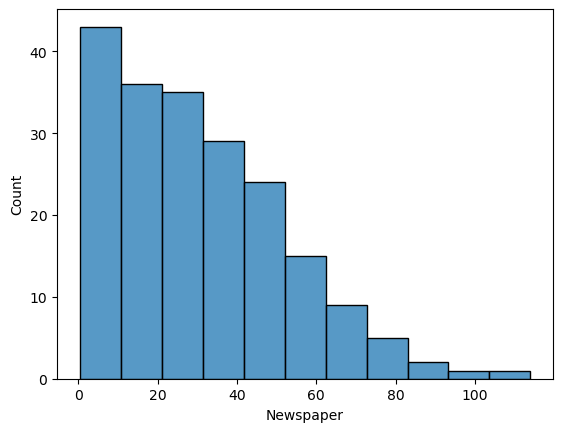

In [100]:
sns.histplot(x=df["Newspaper"],data=df)
plt.show()

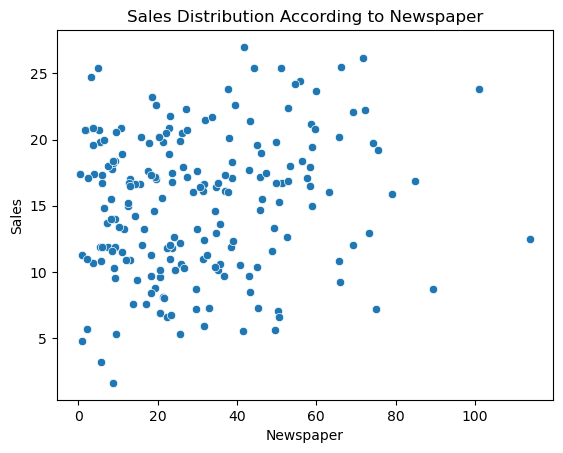

In [101]:
sns.scatterplot(x=df["Newspaper"],y=df["Sales"])
plt.title("Sales Distribution According to Newspaper")
plt.show()

# DATA CLEANING AND PREPROCESSING

C:\Users\doshi\AppData\Local\Temp\ipykernel_23984\3077622747.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Newspaper"])


<Axes: xlabel='Newspaper', ylabel='Density'>

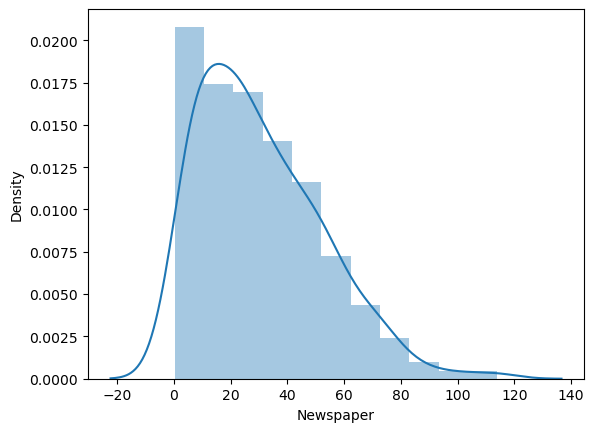

In [34]:
sns.distplot(df["Newspaper"])

In [102]:
# REMOVING OUTLIERS
max_news=df["Newspaper"].quantile(0.95)
max_news

71.82499999999999

In [37]:
df=df[df["Newspaper"]<max_news]

In [38]:
inp=df.iloc[:,:-1]
out=df["Sales"]

In [39]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(inp)
inp=pd.DataFrame(ss.transform(inp),columns=inp.columns)

In [40]:
inp.head(10)

,TV,Radio,Newspaper
0,0.980432,1.021450,2.281548
1,-1.204626,1.123071,0.955087
2,-1.526028,1.570202,2.287052
3,0.055079,1.258565,1.692621
4,0.400026,-0.807725,1.687117
5,-1.051578,0.682714,-0.233775
6,-0.313414,-0.211550,-0.888749
7,-1.627275,-1.397126,-1.472172
8,0.623712,-1.363252,-0.360366
9,-0.950331,-1.146461,-0.195247


In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inp,out,test_size=0.20,random_state=1)

In [65]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)*100,lr.score(x_test,y_test)*100

(89.81292282533434, 90.21058313216608)

In [69]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(LinearRegression(),inp,out,cv=2)*100
min(cv),max(cv)

(87.87709757767497, 89.87331007019958)

In [70]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor(criterion="squared_error",splitter="best",max_depth=2)
dr.fit(x_train,y_train)
dr.score(x_train,y_train)*100,dr.score(x_test,y_test)*100

(84.16921521237914, 83.96295448029304)

In [71]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(DecisionTreeRegressor(criterion="squared_error",splitter="best",max_depth=2),inp,out,cv=2)*100
min(cv),max(cv)

(79.67723280085089, 79.75777192055769)

In [72]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=50,criterion="absolute_error",max_depth=3,ccp_alpha=0.1)
rfr.fit(x_train,y_train)
train=rfr.score(x_train,y_train)*100
test=rfr.score(x_test,y_test)*100
from sklearn.model_selection import cross_val_score
cv=cross_val_score(RandomForestRegressor(n_estimators=50,criterion="squared_error",max_depth=3,ccp_alpha=0.01),inp,out,cv=2)*100
print("Random Forest Regression: ")
print("Training Accuracy: ",train)
print("Testing Accuracy: ",test)
print("Cross Validation: ",min(cv),"& ",max(cv))

Random Forest Regression: 
Training Accuracy:  92.0300401771898
Testing Accuracy:  90.54713188875762
Cross Validation:  90.2585801314862 &  90.58747237084451


In [53]:
tv_sale=float(input("Enter Tv sale: "))
radio_sale=float(input("Enter radio sale: "))
newspaper_sale=float(input("enter newspaper sale: "))
feature=[tv_sale,radio_sale,newspaper_sale]
prediction=rfr.predict([feature])
print("After Analysing Data,we can predict Sales Prediction :",prediction)

Enter Tv sale: -1.62
Enter radio sale: -1.39
enter newspaper sale: -1.47
After Analysing Data,we can predict Sales Prediction : [6.728]


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [49]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor(estimator=RandomForestRegressor(n_estimators=50,criterion="absolute_error",max_depth=3,ccp_alpha=0.1),n_estimators=80)
abr.fit(x_train,y_train)
abr.score(x_train,y_train)*100,abr.score(x_test,y_test)*100

(96.24875788256233, 95.32127453439301)

In [52]:
tv_sale=float(input("Enter Tv sale: "))
radio_sale=float(input("Enter radio sale: "))
newspaper_sale=float(input("enter newspaper sale: "))
feature=[tv_sale,radio_sale,newspaper_sale]
prediction=abr.predict([feature])
print("After Analysing Data,we can predict Sales Prediction :",prediction)

Enter Tv sale: -1.62
Enter radio sale: -1.39
enter newspaper sale: -1.47


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


After Analysing Data,we can predict Sales Prediction : [5.577]


In [29]:
from sklearn.svm import SVR
svr=SVR(kernel="linear")
svr.fit(x_train,y_train)
svr.score(x_train,y_train)*100,svr.score(x_test,y_test)*100

(89.61908761904562, 90.68526062728283)

In [30]:
cv=cross_val_score(SVR(kernel="linear"),inp,out,cv=2)*100
min(cv),max(cv)

(87.19074524635427, 90.96843009984677)